# ptb-diagnostic-ecg-database-1.0.0

In [3]:
# Instalar dependencia wfdb
# pip install wfdb

Note: you may need to restart the kernel to use updated packages.
Información del registro:
Número de canales: 15
Frecuencia de muestreo: 1000
Duración del registro: 115.2 segundos
Nombres de las señales: ['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz']
Unidades de las señales: ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV']
Baselines de las señales: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Máximos de las señales: [0.8895 2.552  2.928  1.1335 1.557  2.6665 2.055  2.4455 3.4385 2.5155
 1.958  1.844  1.059  3.987  1.874 ]
Mínimos de las señales: [-1.0205 -2.184  -2.5365 -1.3135 -1.849  -2.2915 -1.409  -1.374  -1.9985
 -2.0715 -2.652  -1.9985 -1.0615 -2.713  -3.3425]


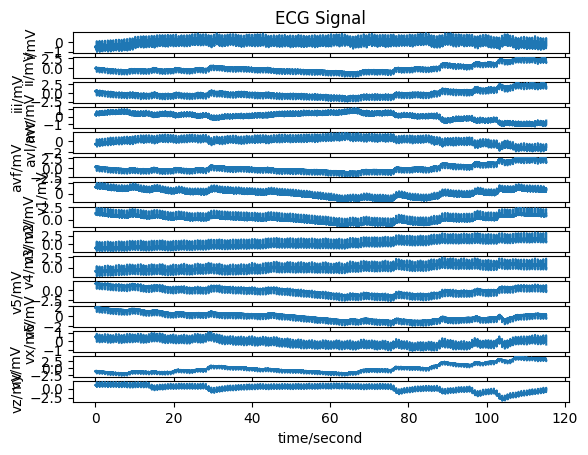

In [1]:

import os
%pip install wfdb
from matplotlib import pyplot as plt
import wfdb

# Ruta a la carpeta de un paciente
carpeta_paciente = '/home/guillermo/ptb-diagnostic-ecg-database-1.0.0/patient001'

# Cargar el registro (archivo .dat y .hea)
record_name = os.path.join(carpeta_paciente, 's0014lre') 

# Leer el archivo .dat y .hea
record = wfdb.rdrecord(record_name)

# Mostrar información del registro de forma que sea fácil de leer
print("Información del registro:")
print("Número de canales:", record.n_sig)
print("Frecuencia de muestreo:", record.fs)
print("Duración del registro:", record.sig_len / record.fs, "segundos")
print("Nombres de las señales:", record.sig_name)
print("Unidades de las señales:", record.units)
print("Baselines de las señales:", record.baseline)
print("Máximos de las señales:", record.p_signal.max(axis=0))
print("Mínimos de las señales:", record.p_signal.min(axis=0))


# Graficar la señal 
wfdb.plot_wfdb(record=record, title="ECG Signal")


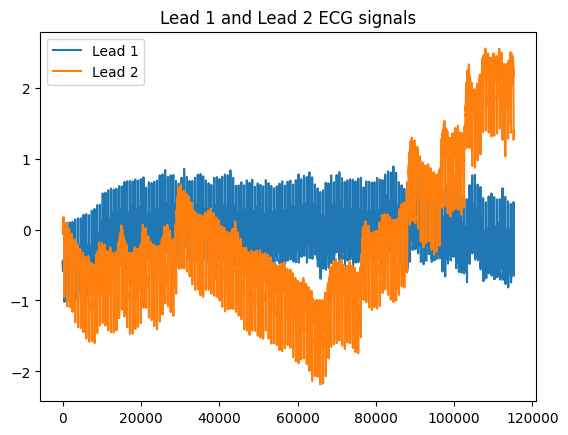

In [2]:
# Acceder a los datos de una derivación específica



lead1 = record.p_signal[:, 0]  # Primera derivación
lead2 = record.p_signal[:, 1]  # Segunda derivación

# Graficar las derivaciones
plt.plot(lead1, label="Lead 1")
plt.plot(lead2, label="Lead 2")
plt.title("Lead 1 and Lead 2 ECG signals")
plt.legend()
plt.show()


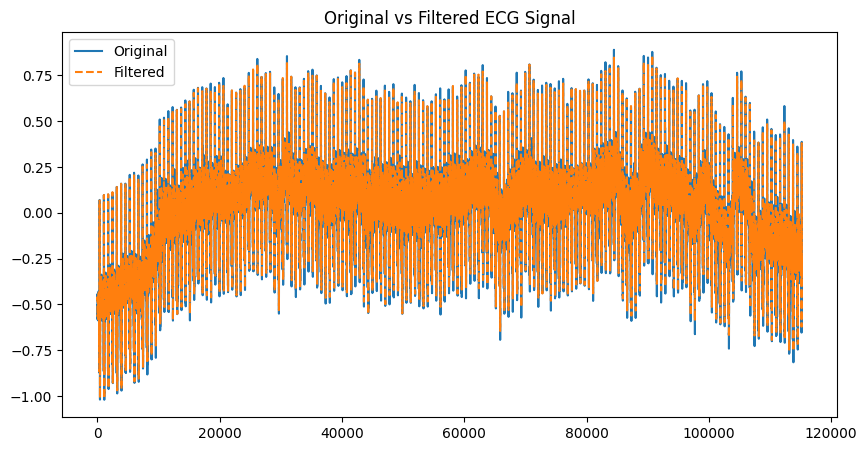

In [3]:
from scipy.signal import butter, filtfilt

# Función para aplicar un filtro de paso bajo
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Aplicar el filtro a una derivación
fs = 1000  # Frecuencia de muestreo
cutoff = 100  # Frecuencia de corte
filtered_signal = butter_lowpass_filter(lead1, cutoff, fs)

# Graficar la señal original y filtrada
plt.figure(figsize=(10, 5))
plt.plot(lead1, label="Original")
plt.plot(filtered_signal, label="Filtered", linestyle='--')
plt.title("Original vs Filtered ECG Signal")
plt.legend()
plt.show()
